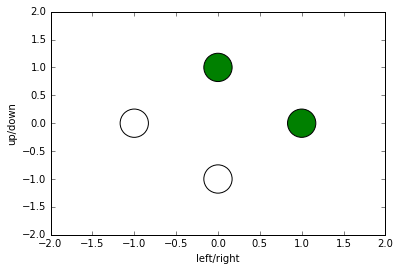

In [ ]:
#Importing libaries
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Parameters setting
sc_fct = 1.1              #scaling factor      
min_neigh = 5             #minimum number of neighbours to identify an area as the specific object
min_size_f = (30,30)      #smallest face dimensions accepted
min_size_e = (10,10)      #smallest eye dimension accepted 

#Defining and initialising a global variable for leds' color
global col           
col=['w','w','w','w']

#Defining a function which calculates x and y of the white pixels mean on the mask
def calc_mean(matr,ew,eh):
    cont=0
    a=0
    b=0
    for i in range(0,ew):
        for j in range(0,eh):
            if (matr[i][j]==255):
                a=a+i;
                b=b+j;
                cont=cont+1;
    if cont>0:
        c=float(a/cont)
        d=float(b/cont)
        return c,d
    
#Defining a function which makes leds change color depending on the middle point position
def leds_on(x_m,y_m,ew,eh):
    if (x_m>ew/2):
        col[3]='g'
        col[0]='w'
    else:
        col[0]='g'
        col[3]='w'
    if (y_m>eh/2):
        col[2]='g'
        col[1]='w'
    else:
        col[1]='g'
        col[2]='w'
        
#Loading the cascade classifier files  
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyeCascade=cv2.CascadeClassifier("haarcascade_eye.xml")

#Capturing the video from the webcam and opening a window to display it
video_capture = cv2.VideoCapture(0)
cv2.namedWindow("EasEY TRACKING")

while True:
    #Capturing frames from the video
    ret, frame = video_capture.read()
    
    #Converting the image from colour to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Using the cascade classifier to identify faces in the video
    faces = faceCascade.detectMultiScale(       
        gray,
        scaleFactor=sc_fct,
        minNeighbors=min_neigh,
        minSize=min_size_f
        )
    #detectMultiscale function returns a list of rectangles described by the upper left vertex and the two dimensions
    
    #Drawing rectangles recognised by the detectMultiscale function
    for (x, y, w, h) in faces:
        cv2.rectangle(frame,(x, y), (x+w, y+h), (0, 255, 0), 2)
        #Defining new regions of interest    
        roi_gray=gray[y:y+h/2,x:x+w]
        roi_color=frame[y:y+h/2,x:x+w]
        
        #Using the cascade classifier to identify eyes within the new ROI just defined
        eyes= eyeCascade.detectMultiScale(         
            roi_gray,
            scaleFactor=sc_fct,
            minNeighbors=min_neigh,
            minSize=min_size_e
            )
        
        #Drawing rectangles returned by the detectMultiscale function
        for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 191, 0), 2)
                 
                #Defining new regions of interest
                roi_gray2=roi_gray[ey:ey+eh,ex:ex+ew]
                
                #Defining threshold values for image filtering (the value corresponds to a grey level)
                lower=np.array([0])
                upper=np.array([80])
                
                #Applying inRange function to pull out from the input image only the pixels that are included in this specific gray range 
                mask = cv2.inRange(roi_gray2, lower, upper)
                #The output is an image where the elements, which are in the range, are shown in white, while everything else il black.  
                
                if (mask==None):
                    continue
                else:
                    #Showing the filtered image and the webcam video
                    cv2.imshow('mask',mask)
                    cv2.imshow("Face and eyes", frame)
                    
                    #Calling functions to calculate middle point of the mask and to change leds color
                    x_m,y_m=calc_mean(mask,ew,eh)
                    leds_on(x_m,y_m,ew,eh)
                    
                    #Clearing the output every time it receives a new input
                    display.clear_output(wait=True)  
                    #Plotting and showing the scatterplot representing the leds
                    plt.scatter([-1,0,0,1],[0,1,-1,0],s=800,c=col)
                    plt.axis([-2,2,-2,2])
                    plt.xlabel('left/right')
                    plt.ylabel('up/down')
                    plt.show()   
    
    #Breaking the while cicle when 'return' is pressed           
    if cv2.waitKey(1)==27:
        break
              
#Closing al windows and turning webcams off
video_capture.release()
cv2.destroyAllWindows()